<a href="https://colab.research.google.com/github/AritraN18/DEMO/blob/main/Advertisement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Advertising.csv")

In [4]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [5]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df.drop('Unnamed: 0',axis = 1)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [7]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


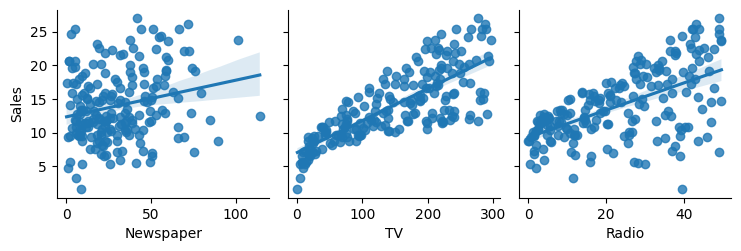

In [10]:
sns.pairplot(df, x_vars=["Newspaper", "TV", "Radio"], y_vars="Sales",kind='reg')

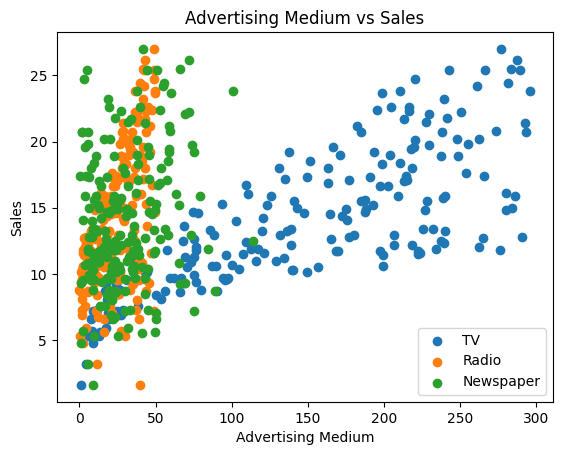

In [11]:
fig, ax = plt.subplots()
ax.scatter(df['TV'], df['Sales'], label='TV')
ax.scatter(df['Radio'], df['Sales'], label='Radio')
ax.scatter(df['Newspaper'], df['Sales'], label='Newspaper')
ax.set_xlabel('Advertising Medium')
ax.set_ylabel('Sales')
ax.set_title('Advertising Medium vs Sales')
ax.legend()

Text(0.5, 1.0, 'Correlation Heatmap')

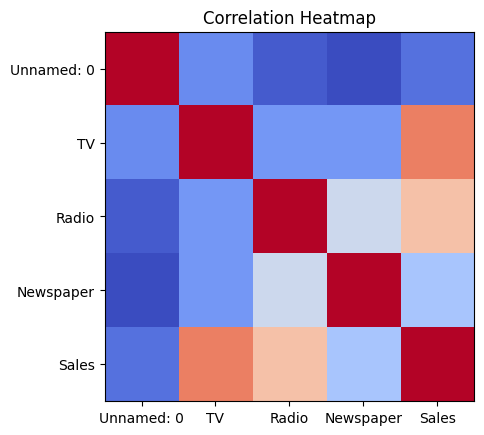

In [12]:
fig, ax = plt.subplots()
corr = df.corr()
ax.imshow(corr, cmap='coolwarm')
ax.set_xticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticks(range(len(corr.columns)))
ax.set_yticklabels(corr.columns)
ax.set_title('Correlation Heatmap')

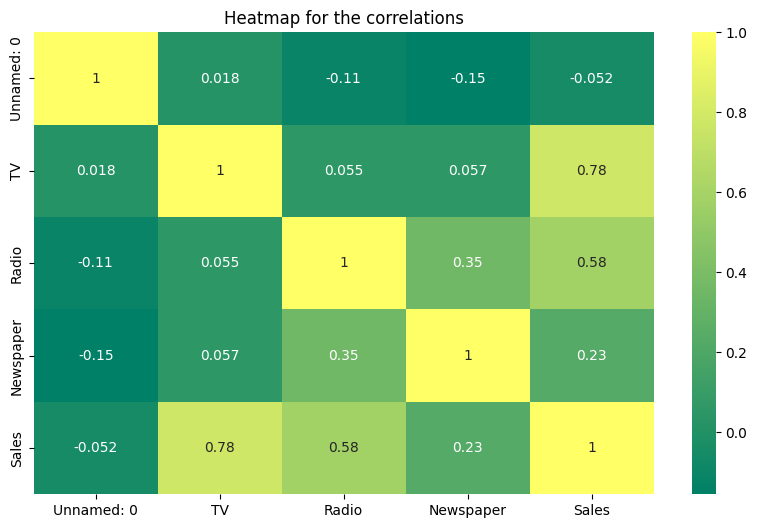

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="summer")
plt.title("Heatmap for the correlations")
plt.show()

Text(0.5, 1.0, 'Sales Distribution by Advertising Medium')

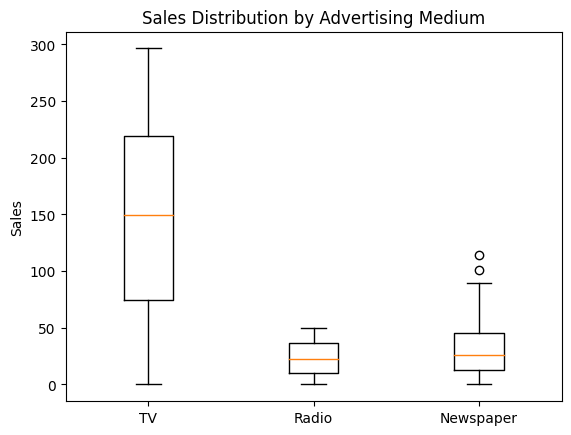

In [14]:
fig, ax = plt.subplots()
ax.boxplot([df['TV'], df['Radio'], df['Newspaper']])
ax.set_xticklabels(['TV', 'Radio', 'Newspaper'])
ax.set_ylabel('Sales')
ax.set_title('Sales Distribution by Advertising Medium')

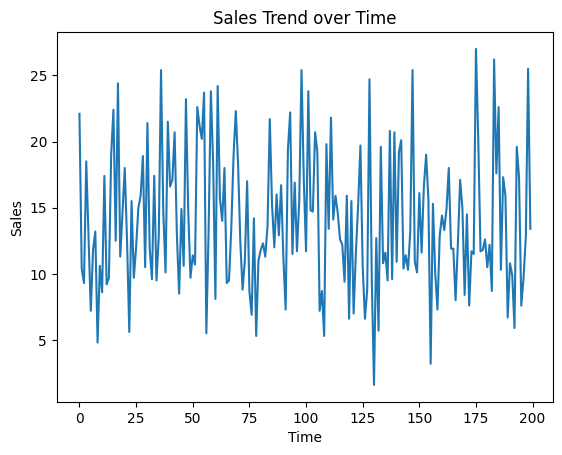

In [15]:
fig, ax = plt.subplots()
ax.plot(df['Sales'])
ax.set_xlabel('Time')
ax.set_ylabel('Sales')
ax.set_title('Sales Trend over Time')

plt.show()

In [16]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.neural_network import MLPRegressor

In [18]:
from xgboost import XGBRegressor

In [19]:
svr = SVR()
lr = LinearRegression()
sgdr = SGDRegressor()
knr = KNeighborsRegressor()
gpr = GaussianProcessRegressor()
dtr = DecisionTreeRegressor()
gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor()
xgbr = XGBRegressor()
mlpr = MLPRegressor()
ir = IsotonicRegression()

In [20]:
models = {"a" :["LinearRegression",lr],
 "b": ["SVR", svr],
 "c": ["SGDRegressor", sgdr],
 "d": ["KNeighborsRegressor",knr],
 "e": ["GaussianProcessRegressor" , gpr],
 "f": ["DecisionTreeRegressor", dtr],
 "g": ["GradientBoostingRegressor",gbr],
 "h": ["RandomForestRegressor" , rfr],
 "i": ["XGBRegressor", xgbr],
 "j": ["MLPRegressor", mlpr],
          "k": ["IsotonicRegression", ir]
}

In [21]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer , r2_score

def test_model(model, X_train = X_train, y_train = y_train):
  cv = KFold(n_splits= 7, shuffle = True, random_state = 45)
  r2 = make_scorer(r2_score)
  r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2)
  score = [r2_val_score.mean()]
  return score

In [22]:
models_score = []
for model in models:
  print("Training model: ", models[model][0])
  score = test_model(models[model][1],X_train , y_train)
  print("Score of model :", score)
  models_score.append([models[model][0], score[0]])

Training model:  LinearRegression
Score of model : [0.8817172226918385]
Training model:  SVR
Score of model : [0.7781668672049022]
Training model:  SGDRegressor
Score of model : [-2.360512172922555e+25]
Training model:  KNeighborsRegressor
Score of model : [0.8963620589500793]
Training model:  GaussianProcessRegressor
Score of model : [-8.206668655974893]
Training model:  DecisionTreeRegressor
Score of model : [0.9386777912071356]
Training model:  GradientBoostingRegressor
Score of model : [0.9705099782257287]
Training model:  RandomForestRegressor
Score of model : [0.9739287104205612]
Training model:  XGBRegressor
Score of model : [0.9657054128131645]
Training model:  MLPRegressor


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Score of model : [0.020045484318048645]
Training model:  IsotonicRegression


ValueError: ignored

In [23]:
models_score

[['LinearRegression', 0.8817172226918385],
 ['SVR', 0.7781668672049022],
 ['SGDRegressor', -2.360512172922555e+25],
 ['KNeighborsRegressor', 0.8963620589500793],
 ['GaussianProcessRegressor', -8.206668655974893],
 ['DecisionTreeRegressor', 0.9386777912071356],
 ['GradientBoostingRegressor', 0.9705099782257287],
 ['RandomForestRegressor', 0.9739287104205612],
 ['XGBRegressor', 0.9657054128131645],
 ['MLPRegressor', 0.020045484318048645]]

In [24]:
max_score = max(models_score, key=lambda x: x[1])

print("Model with the highest score:", max_score[0])
print("Highest score:", max_score[1])

Model with the highest score: RandomForestRegressor
Highest score: 0.9739287104205612


In [25]:
xgbr.fit(X_train,y_train)
training_data_prediction = xgbr.predict(X_train)


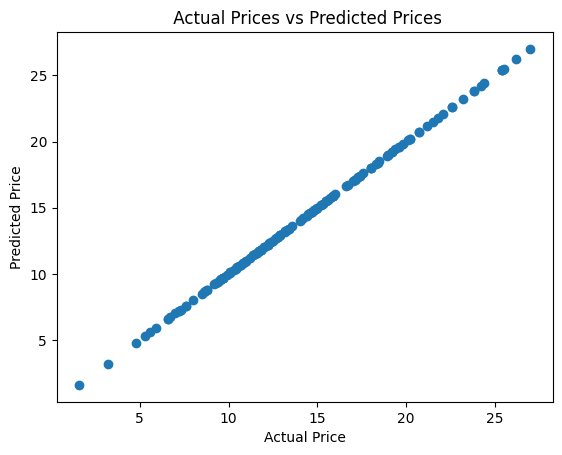

In [26]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [27]:
import random

df['Total'] = df['Newspaper']+ df['TV'] + df['Radio']

In [28]:
random.seed(42)  # Setting a seed for reproducibility
sample_data = df[['TV', 'Radio', 'Newspaper']].sample(5)

In [29]:
rfr.fit(X_train,y_train)
training_data_prediction = rfr.predict(sample_data)

In [30]:
training_data_prediction

array([18.053, 16.347, 12.677, 12.97 ,  7.475])